In [1]:
# !source /Users/richardye/Documents/Python/venv_ubineer/bin/activate
# !pip install torch

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [1]:
import os
import json
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import bertopic
# nltk.download('stopwords')
# nltk.download('wordnet')

In [2]:
df1 = pd.read_json("data/bq_2016_2018_filings.json", lines = True)
df1

,filingDate,reportingDate,financialEntity,coDescription,CIK
0,2017-06-29 21:31:09 UTC,2017-04-01,financialEntities/params;cik=1582249,"ITEM 1.BUSINESS3<font style=""font-family:inher...",1582249
1,2017-06-29 20:05:22 UTC,2017-04-01,financialEntities/params;cik=1164888,ITEM1.Business 3 ITEM2.Properties 4 ITEM3.Le...,1164888
2,2016-03-03 17:53:54 UTC,2016-02-01,financialEntities/params;cik=1637459,Item 1. Business.General Kraft Heinz is one o...,1637459
3,2018-05-25 01:55:42 UTC,2018-04-01,financialEntities/params;cik=1302215,"Item 1.BusinessEstablished in 1972, Houlihan L...",1302215
4,2018-12-19 22:01:54 UTC,2018-10-01,financialEntities/params;cik=725363,ITEM1B. UNRESOLVED SECCOMMENTS None ITEM2. ...,725363
...,...,...,...,...,...
3523,2016-03-31 20:19:48 UTC,2016-02-01,financialEntities/params;cik=719955,"ITEM 1.BUSINESS OVERVIEW Williams-Sonoma, Inc...",719955
3524,2018-03-22 20:24:54 UTC,2018-01-01,financialEntities/params;cik=1604119,"Item 1. Business.Omitted.<font face=""Times Ne...",1604119
3525,2017-12-15 19:36:43 UTC,2017-10-01,financialEntities/params;cik=1424844,Item 1. Business.The Company is an Iowa limi...,1424844
3526,2017-12-29 21:12:25 UTC,2017-10-01,financialEntities/params;cik=725363,ITEM1B. UNRESOLVED SEC COMMENTS None ITEM2. PR...,725363


In [3]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/richardye/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
import std_func

clean_df = std_func.clean(df1)
clean_df

,filingDate,reportingDate,financialEntity,coDescription,CIK,coDescription_lemmatized,coDescription_stopwords
1,2017-06-29 20:05:22 UTC,2017-04-01,financialEntities/params;cik=1164888,m2.properties 4 item3.legalproceedings 4 ite...,1164888,m2.properties 4 item3.legalproceedings 4 item4...,disclosure part iiitem marketfor registrant co...
2,2016-03-03 17:53:54 UTC,2016-02-01,financialEntities/params;cik=1637459,l kraft heinz is one of the largest food and b...,1637459,l kraft heinz is one of the largest food and b...,l kraft heinz one largest food beverage compan...
3,2018-05-25 01:55:42 UTC,2018-04-01,financialEntities/params;cik=1302215,"established in 1972, houlihan lokey, inc., is ...",1302215,"established in 1972 , houlihan lokey , inc. , ...",established houlihan lokey leading global inde...
4,2018-12-19 22:01:54 UTC,2018-10-01,financialEntities/params;cik=725363,solved seccomments none item2.properties cel-s...,725363,solved seccomments none item2.properties cel-s...,solved seccomments none office space boone blv...
5,2018-02-28 18:47:50 UTC,2018-01-01,financialEntities/params;cik=103379,"orporation, organized in 1899, is a global lea...",103379,"orporation , organized in 1899 , is a global l...",orporation organized global leader design prod...
...,...,...,...,...,...,...,...
3522,2016-11-22 20:08:17 UTC,2016-10-01,financialEntities/params;cik=1352081,of contentsbusiness developmentcardinal ethano...,1352081,of contentsbusiness developmentcardinal ethano...,contentsbusiness developmentcardinal ethanol l...
3523,2016-03-31 20:19:48 UTC,2016-02-01,financialEntities/params;cik=719955,"williams-sonoma, inc., incorporated in 1973, i...",719955,"williams-sonoma , inc. , incorporated in 1973 ...",incorporated specialty retailer high quality p...
3525,2017-12-15 19:36:43 UTC,2017-10-01,financialEntities/params;cik=1424844,mpany is an iowa limited liability company loc...,1424844,mpany is an iowa limited liability company loc...,mpany iowa limited liability company located c...
3526,2017-12-29 21:12:25 UTC,2017-10-01,financialEntities/params;cik=725363,olved sec comments none item2. properties cel-...,725363,olved sec comment none item2 . property cel-sc...,olved sec comment none item property office sp...


In [6]:
count_filings = clean_df.merge(pd.Series(clean_df.groupby("CIK").size(), name = "reports"), how = "left", on = "CIK")
count_filings

,filingDate,reportingDate,financialEntity,coDescription,CIK,coDescription_lemmatized,coDescription_stopwords,reports
0,2017-06-29 20:05:22 UTC,2017-04-01,financialEntities/params;cik=1164888,m2.properties 4 item3.legalproceedings 4 ite...,1164888,m2.properties 4 item3.legalproceedings 4 item4...,disclosure part iiitem marketfor registrant co...,3
1,2016-03-03 17:53:54 UTC,2016-02-01,financialEntities/params;cik=1637459,l kraft heinz is one of the largest food and b...,1637459,l kraft heinz is one of the largest food and b...,l kraft heinz one largest food beverage compan...,3
2,2018-05-25 01:55:42 UTC,2018-04-01,financialEntities/params;cik=1302215,"established in 1972, houlihan lokey, inc., is ...",1302215,"established in 1972 , houlihan lokey , inc. , ...",established houlihan lokey leading global inde...,3
3,2018-12-19 22:01:54 UTC,2018-10-01,financialEntities/params;cik=725363,solved seccomments none item2.properties cel-s...,725363,solved seccomments none item2.properties cel-s...,solved seccomments none office space boone blv...,3
4,2018-02-28 18:47:50 UTC,2018-01-01,financialEntities/params;cik=103379,"orporation, organized in 1899, is a global lea...",103379,"orporation , organized in 1899 , is a global l...",orporation organized global leader design prod...,3
...,...,...,...,...,...,...,...,...
2003,2016-11-22 20:08:17 UTC,2016-10-01,financialEntities/params;cik=1352081,of contentsbusiness developmentcardinal ethano...,1352081,of contentsbusiness developmentcardinal ethano...,contentsbusiness developmentcardinal ethanol l...,3
2004,2016-03-31 20:19:48 UTC,2016-02-01,financialEntities/params;cik=719955,"williams-sonoma, inc., incorporated in 1973, i...",719955,"williams-sonoma , inc. , incorporated in 1973 ...",incorporated specialty retailer high quality p...,3
2005,2017-12-15 19:36:43 UTC,2017-10-01,financialEntities/params;cik=1424844,mpany is an iowa limited liability company loc...,1424844,mpany is an iowa limited liability company loc...,mpany iowa limited liability company located c...,3
2006,2017-12-29 21:12:25 UTC,2017-10-01,financialEntities/params;cik=725363,olved sec comments none item2. properties cel-...,725363,olved sec comment none item2 . property cel-sc...,olved sec comment none item property office sp...,3


In [8]:
count_filings.to_csv("data/timeseries_data.csv")

In [8]:
filtered = count_filings[count_filings["reports"] > 2].sort_values(["CIK","filingDate"])
filtered

,filingDate,reportingDate,financialEntity,coDescription,CIK,coDescription_lemmatized,coDescription_stopwords,reports
1948,2016-12-06 22:05:12 UTC,2016-10-01,financialEntities/params;cik=3545,"alico, inc. (“alico”), was incorporated under ...",3545,"alico , inc. ( “ alico ” ) , wa incorporated u...",alico alico wa incorporated law state florida ...,3
1456,2017-12-11 22:13:06 UTC,2017-10-01,financialEntities/params;cik=3545,"alico, inc. (“alico”) was incorporated under t...",3545,"alico , inc. ( “ alico ” ) wa incorporated und...",alico alico wa incorporated law state florida ...,3
83,2018-12-06 21:58:38 UTC,2018-10-01,financialEntities/params;cik=3545,"alico, inc. (“alico”) was incorporated under t...",3545,"alico , inc. ( “ alico ” ) wa incorporated und...",alico alico wa incorporated law state florida ...,3
832,2016-05-25 20:19:47 UTC,2016-04-01,financialEntities/params;cik=4457,we are north america’s largest “do-it-yourself...,4457,we are north america ’ s largest “ do-it-yours...,north america largest moving storage operator ...,3
1242,2017-05-24 20:07:02 UTC,2017-04-01,financialEntities/params;cik=4457,we are north america’s largest “do-it-yourself...,4457,we are north america ’ s largest “ do-it-yours...,north america largest moving storage operator ...,3
...,...,...,...,...,...,...,...,...
1531,2017-11-29 02:25:15 UTC,2017-10-01,financialEntities/params;cik=1666138,llowing discussion of our business contains fo...,1666138,llowing discussion of our business contains fo...,llowing discussion business contains statement...,3
481,2018-11-28 01:38:36 UTC,2018-10-01,financialEntities/params;cik=1666138,llowing discussion of our business contains fo...,1666138,llowing discussion of our business contains fo...,llowing discussion business contains statement...,3
963,2016-12-19 14:14:40 UTC,2016-10-01,financialEntities/params;cik=1674910,generalvalvoline inc. is a kentucky corporatio...,1674910,generalvalvoline inc. is a kentucky corporatio...,generalvalvoline kentucky corporation principa...,3
1760,2017-11-17 17:10:16 UTC,2017-10-01,financialEntities/params;cik=1674910,"generalvalvoline inc., a kentucky corporation,...",1674910,"generalvalvoline inc. , a kentucky corporation...",generalvalvoline kentucky corporation worldwid...,3


In [9]:
data = filtered.loc[:,"coDescription_stopwords"].to_list()
dates = filtered["filingDate"].to_list()

In [11]:
from bertopic import BERTopic

topic_model = BERTopic(min_topic_size=5, n_gram_range=(1,3),verbose=True)

topics,_ = topic_model.fit_transform(data)

Downloading: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 1.18k/1.18k [00:00<00:00, 286kB/s]
Downloading: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 10.2k/10.2k [00:00<00:00, 2.74MB/s]
Downloading: 100%|███████████████████████████████████████████████████████████████████████████████████████████████| 116/116 [00:00<00:00, 38.0kB/s]
Downloading: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 39.3k/39.3k [00:00<00:00, 860kB/s]
Downloading: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 349/349 [00:00<00:00, 121kB/s]
Downloading: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 90.9M/90.9M [00:17<00:00, 5.23MB/s]
Downloading: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 53.0/

In [31]:
freq = topic_model.get_topic_info()
freq

,Topic,Count,Name
0,-1,341,-1_product_company_business_customer
1,0,59,0_food_product_beverage_brand
2,1,40,1_company_share_business_july
3,2,35,2_loan_bank_federal_institution
4,3,33,3_music_artist_company_recorded music
...,...,...,...
80,98,6,98_led_qds_lighting_chip
79,99,6,99_circuit_material_company_printed circuit
78,100,6,100_aircraft_service_part_flight support
102,101,5,101_tanning_skin_subco_notox


Topic -1 contains outlier documents which contain mainly terms with high pravelance across the whole corpus, implying they have a low specificity toward any other topic

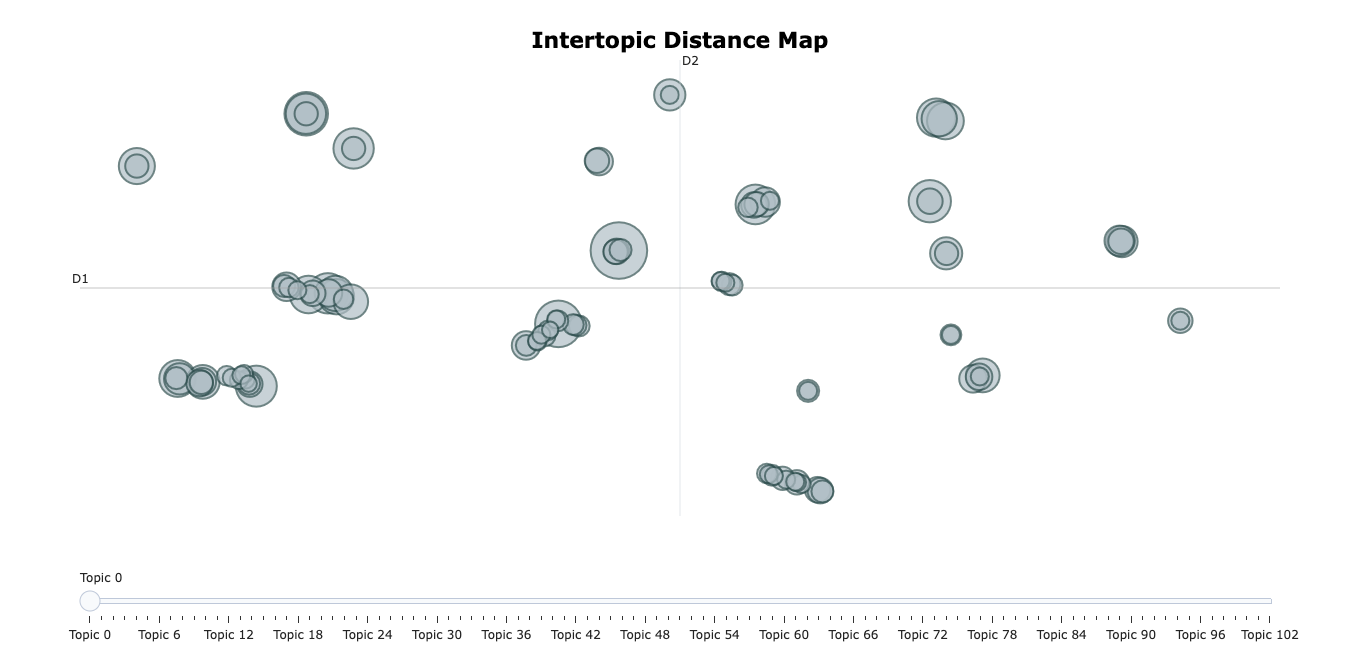

In [24]:
topic_model.visualize_topics()

In [28]:
topic_model.embedding_model

<104x3287740 sparse matrix of type '<class 'numpy.float64'>'
	with 4696784 stored elements in Compressed Sparse Row format>

In [30]:
topics_over_time = topic_model.topics_over_time(freq["Name"], freq["Topic"], )
topic_model.visualize_topics_over_time(topics_over_time)

TypeError: topics_over_time() missing 1 required positional argument: 'timestamps'